In [11]:
import torch.nn as nn
import torch.optim as optim

class Task1ModelAAIndex(nn.Module):
    def __init__(self):
        super().__init__()
        self.le_relu = nn.LeakyReLU()
        self.hidden_layer_1 = nn.Linear(553, 369, dtype=torch.float32)
        self.dropout = nn.Dropout(0.5)
        self.hidden_layer_2 = nn.Linear(369, 128, dtype=torch.float32)
        self.output_layer = nn.Linear(128, 1, dtype=torch.float32)
        self.sigmoid = nn.Sigmoid()
        
    def forward(self, x):
        h1 = self.le_relu(self.hidden_layer_1(x))
        d1 = self.dropout(h1)
        h2 = self.le_relu(self.hidden_layer_2(d1))
        return self.sigmoid(self.output_layer(h2))

In [12]:
from torch.utils.data import Dataset, DataLoader
import pandas as pd

class Task1Dataset(Dataset):
    def __init__(self, X, y):
        self.X = X
        self.y = y
    
    def __len__(self):
        return len(self.X)

    def __getitem__(self, idx):
        return self.X[idx], self.y[idx]

In [1]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, matthews_corrcoef, accuracy_score, precision_score, recall_score
from protlearn import * 
import pandas as pd
import numpy as np

df = pd.read_csv('/Users/daniel/Desktop/PBL/Task 1/preprocessed/pp_task1_c50_15_70.tsv', sep='\t')

seq_list = [seq for seq in df['Sequence']]
y = [enz for enz in df['Enzyme']]
#X = features.aaindex1(seq_list, standardize='zscore')[0]
#X = np.load('prott5.npy')

/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/protlearn/features/aaindex1.py:8: UserWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html. The pkg_resources package is slated for removal as early as 2025-11-30. Refrain from using this package or pin to Setuptools<81.
  import pkg_resources


In [3]:
from utils.pre_processing_task_1 import PreProcessingTask1 as pp

pp.df_to_fasta(df.sample(20), '/Users/daniel/Downloads/test.fasta')

AttributeError: type object 'PreProcessingTask1' has no attribute 'create_fasta'

In [ ]:
import torch
X_tensor = torch.tensor(X, dtype=torch.float32)
y_tensor = torch.tensor(y, dtype=torch.float32).unsqueeze(dim=1)

In [18]:
X_temp, X_test, y_temp, y_test = train_test_split(X_tensor, y_tensor, test_size=0.2, random_state=123)
X_train, X_val, y_train, y_val = train_test_split(X_tensor, y_tensor, test_size=0.2, random_state=24)

In [5]:
dataset = Task1Dataset(X_tensor, y_tensor)
#dataloader_training = DataLoader(dataset=training_dataset, batch_size=32, shuffle=True)

In [6]:
learning_rate = 0.01
model = Task1ModelAAIndex()
optimizer = optim.SGD(model.parameters(), lr=learning_rate)
criterion = nn.BCELoss()

Fold 1
Train loss: 0.5559, Validation loss: 0.5133, Validation acc: 0.7495
Train loss: 0.5041, Validation loss: 0.4991, Validation acc: 0.7616
Train loss: 0.4912, Validation loss: 0.5066, Validation acc: 0.7598
Train loss: 0.4836, Validation loss: 0.4920, Validation acc: 0.7635
Train loss: 0.4804, Validation loss: 0.4856, Validation acc: 0.7657
Fold 2
Train loss: 0.5497, Validation loss: 0.5018, Validation acc: 0.7545
Train loss: 0.5050, Validation loss: 0.4920, Validation acc: 0.7612
Train loss: 0.4927, Validation loss: 0.4842, Validation acc: 0.7633
Train loss: 0.4882, Validation loss: 0.4813, Validation acc: 0.7651
Train loss: 0.4804, Validation loss: 0.4866, Validation acc: 0.7640
Fold 3
Train loss: 0.5557, Validation loss: 0.4984, Validation acc: 0.7605
Train loss: 0.5071, Validation loss: 0.4762, Validation acc: 0.7737
Train loss: 0.4945, Validation loss: 0.4733, Validation acc: 0.7802
Train loss: 0.4900, Validation loss: 0.4651, Validation acc: 0.7837
Train loss: 0.4834, Validat

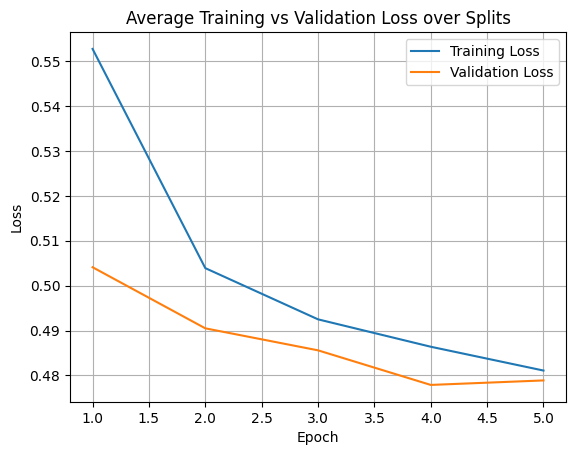

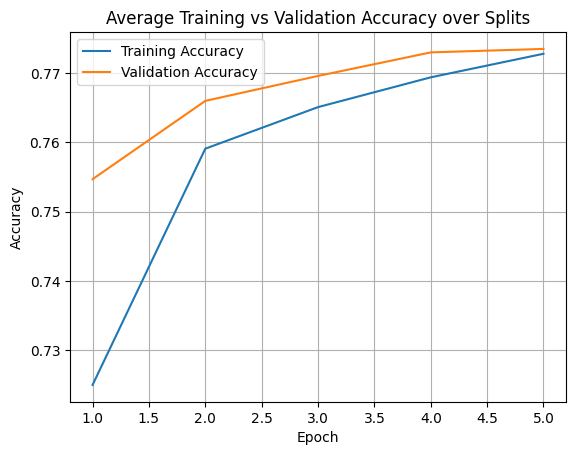

5 [[np.float64(0.7657), 2201.0, 772.0, 488.0, 1917.0], [np.float64(0.764), 2084.0, 665.0, 604.0, 2024.0], [np.float64(0.7843), 2161.0, 633.0, 527.0, 2056.0], [np.float64(0.7755), 2038.0, 556.0, 651.0, 2132.0], [np.float64(0.7779), 2189.0, 694.0, 500.0, 1994.0]]


In [7]:
import utils.cross_validation as cv

test = cv.cross_validate(Task1ModelAAIndex, dataset, optim.SGD, criterion, 5, 32, learning_rate, 200)

In [13]:
test[:, 0]

array([0.7657, 0.764 , 0.7843, 0.7755, 0.7779])

In [8]:
import numpy as np

In [19]:
from sklearn.metrics import confusion_matrix, accuracy_score, matthews_corrcoef
num_epochs = 50
train_acc = []
val_acc = []

for e in range(num_epochs):
    model.train()
    total_loss = 0
    for feats, labels in dataloader:
        optimizer.zero_grad()
        outputs = model(feats)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        total_loss += loss.item()
    avg_loss = total_loss / (len(training_dataset) / dataloader_training.batch_size)
    print(avg_loss)
    #train_losses.append(avg_loss)
    #print('Training loss: ' + str(avg_loss))
    
    model.eval()
    with torch.no_grad():
        thresh = 0.5
        train_outputs_temp = model(X_train)
        train_outputs = [1 if o > thresh else 0 for o in train_outputs_temp]
        val_outputs_temp = model(X_val)
        val_outputs = [1 if o > thresh else 0 for o in val_outputs_temp]
        train_acc.append(accuracy_score(y_train, train_outputs))
        val_acc.append(accuracy_score(y_val, val_outputs))
        #val_loss = criterion(val_outputs, y_val)
        #if val_loss > 2:
        #    val_losses.append(2)
        #else:
        #    val_losses.append(val_loss)
        #print('Validation loss: ' + str(val_avg_loss))

0.48303549449145683
0.47928662471434974
0.47592662973949473
0.47345884706632974
0.4712280829481485
0.4706032569853756
0.4679073497474544
0.4663497250429321
0.4647819315368271
0.4641724702796349
0.4619779154222689
0.46258213118695257
0.4589908942929391
0.45978317542382224
0.4592125843228005
0.4581256320165628
0.4588484675244172
0.4570244219494143
0.455790752439833
0.4559874135557761
0.45593114253231914
0.45462500728915634
0.4519682261309418
0.4526391317382735
0.45282604598062587
0.45283985489102724
0.4506843921853204
0.450175595427166
0.4503514837103125
0.45043520637276113
0.4489221192803809
0.44838284130191497
0.4472282843017635
0.447401768198363
0.44671150897218387
0.44620000621725
0.44715085801451826
0.44634086757794134
0.44311670926074265
0.443468697660072


KeyboardInterrupt: 

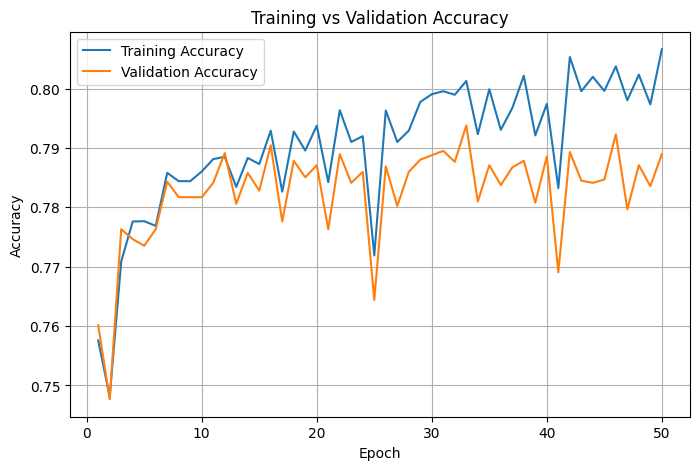

In [21]:
import matplotlib.pyplot as plt

epochs = range(1, num_epochs + 1)

plt.figure(figsize=(8,5))
plt.plot(epochs, train_acc, label='Training Accuracy')
plt.plot(epochs, val_acc, label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training vs Validation Accuracy')
plt.legend()
plt.grid(True)
plt.savefig('images/accuracy_tracking/train_val_acc_22.png')
plt.show()

In [75]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import matthews_corrcoef, accuracy_score, precision_score, recall_score
import numpy as np

with torch.no_grad():
    y_test_final = [a.squeeze().item() for a in y_test]
    y_pred = model(X_test)
    y_pred_rounded = torch.round(y_pred)
    y_pred_final = [a.squeeze().item() for a in y_pred_rounded]
confusion_matrix(y_test_final, y_pred_final)
matthews_corrcoef(y_test_final, y_pred_final)
print(precision_score(y_test_final, y_pred_final))
recall_score(y_test_final, y_pred_final)


0.9390378259272861


0.9390378259272861

In [14]:
from sklearn.metrics import confusion_matrix

t1 = [1, 0, 1]
t2 = [1, 1, 1]

np.stack([np.round((4+3)/7)])

array([1.])

In [12]:
np.vstack([[np.float64(0.7668), 2369.0, 934.0, 320.0, 1755.0], [np.float64(0.7805), 2104.0, 596.0, 584.0, 2093.0], [np.float64(0.7686), 2192.0, 748.0, 496.0, 1941.0], [np.float64(0.7657), 2190.0, 761.0, 499.0, 1927.0], [np.float64(0.7383), 2141.0, 859.0, 548.0, 1829.0]])

array([[7.668e-01, 2.369e+03, 9.340e+02, 3.200e+02, 1.755e+03],
       [7.805e-01, 2.104e+03, 5.960e+02, 5.840e+02, 2.093e+03],
       [7.686e-01, 2.192e+03, 7.480e+02, 4.960e+02, 1.941e+03],
       [7.657e-01, 2.190e+03, 7.610e+02, 4.990e+02, 1.927e+03],
       [7.383e-01, 2.141e+03, 8.590e+02, 5.480e+02, 1.829e+03]])

In [1]:
import yaml

yaml.safe_load()